In [1]:
import os
import re
import sys

import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics as skmetrics
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.font_manager import fontManager
from IPython.display import display
from ipywidgets import interact, FloatSlider
from umap import UMAP
import ipynbname
from endaaman.ml import fix_global_seed

fix_global_seed()

project_root = os.path.abspath(os.path.join(os.path.dirname(ipynbname.path()), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)
os.chdir(project_root)
print('now working', project_root)


sns.set_theme(style='ticks', palette='tab10')
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'figure.dpi': 300,
})

os.makedirs('out/figs', exist_ok=True)

now working /home/ken/src/github.com/endaaman/bt


## fig1 pie
- Draw pie chart ing fig1

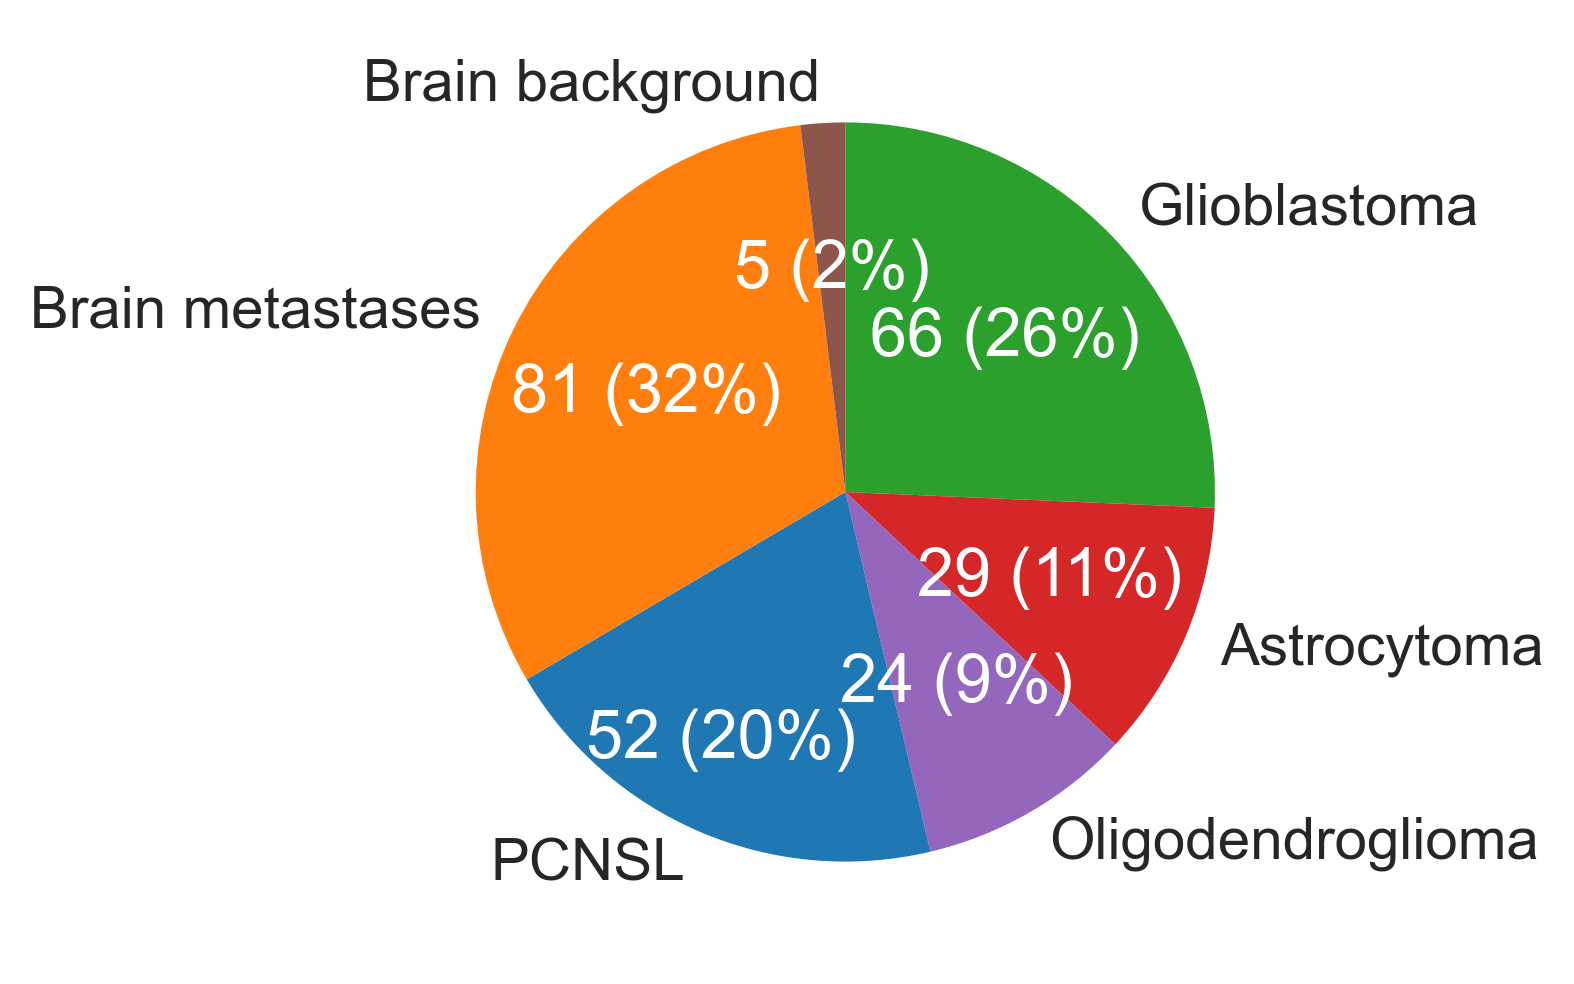

In [2]:
colors = [
    sns.color_palette()[2],
    sns.color_palette()[3],
    sns.color_palette()[4],
    sns.color_palette()[0],
    sns.color_palette()[1],
    sns.color_palette()[5],
]

data = {
    'Glioblastoma': 66,
    'Astrocytoma': 29,
    'Oligodendroglioma': 24,
    'PCNSL': 52,
    'Brain metastases': 81,
    'Brain background': 5,
}

labels = list(data.keys())
counts = list(data.values())
total = sum(counts)

# 凡例用のラベルを作成（数値と割合を含める）
legend_labels = [
    f'{label}: {count} ({round(count/total*100)}%)'
    for label, count in data.items()
]


plt.figure(figsize=(6, 4))
wedges, texts, autotexts = plt.pie(
    counts, 
    startangle=90, 
    counterclock=False, 
    colors=colors,

    # labels=None,
    labels=labels,
    # labeldistance=1.1,
    
    autopct=lambda p: f'{round(p*total/100)} ({round(p)}%)',
    # pctdistance=0.8,
    wedgeprops={'width': 1, 'edgecolor': 'white', 'linewidth': 0},
)

# L: move upper
pos = autotexts[-3].get_position()
autotexts[-3].set_position((pos[0]-0.1, pos[1]-0.12))

for text in autotexts:
    text.set_fontsize(16)
    text.set_color('white')


plt.savefig('out/figs/fig1/dataset_pie_local.png', format='png')
plt.show()

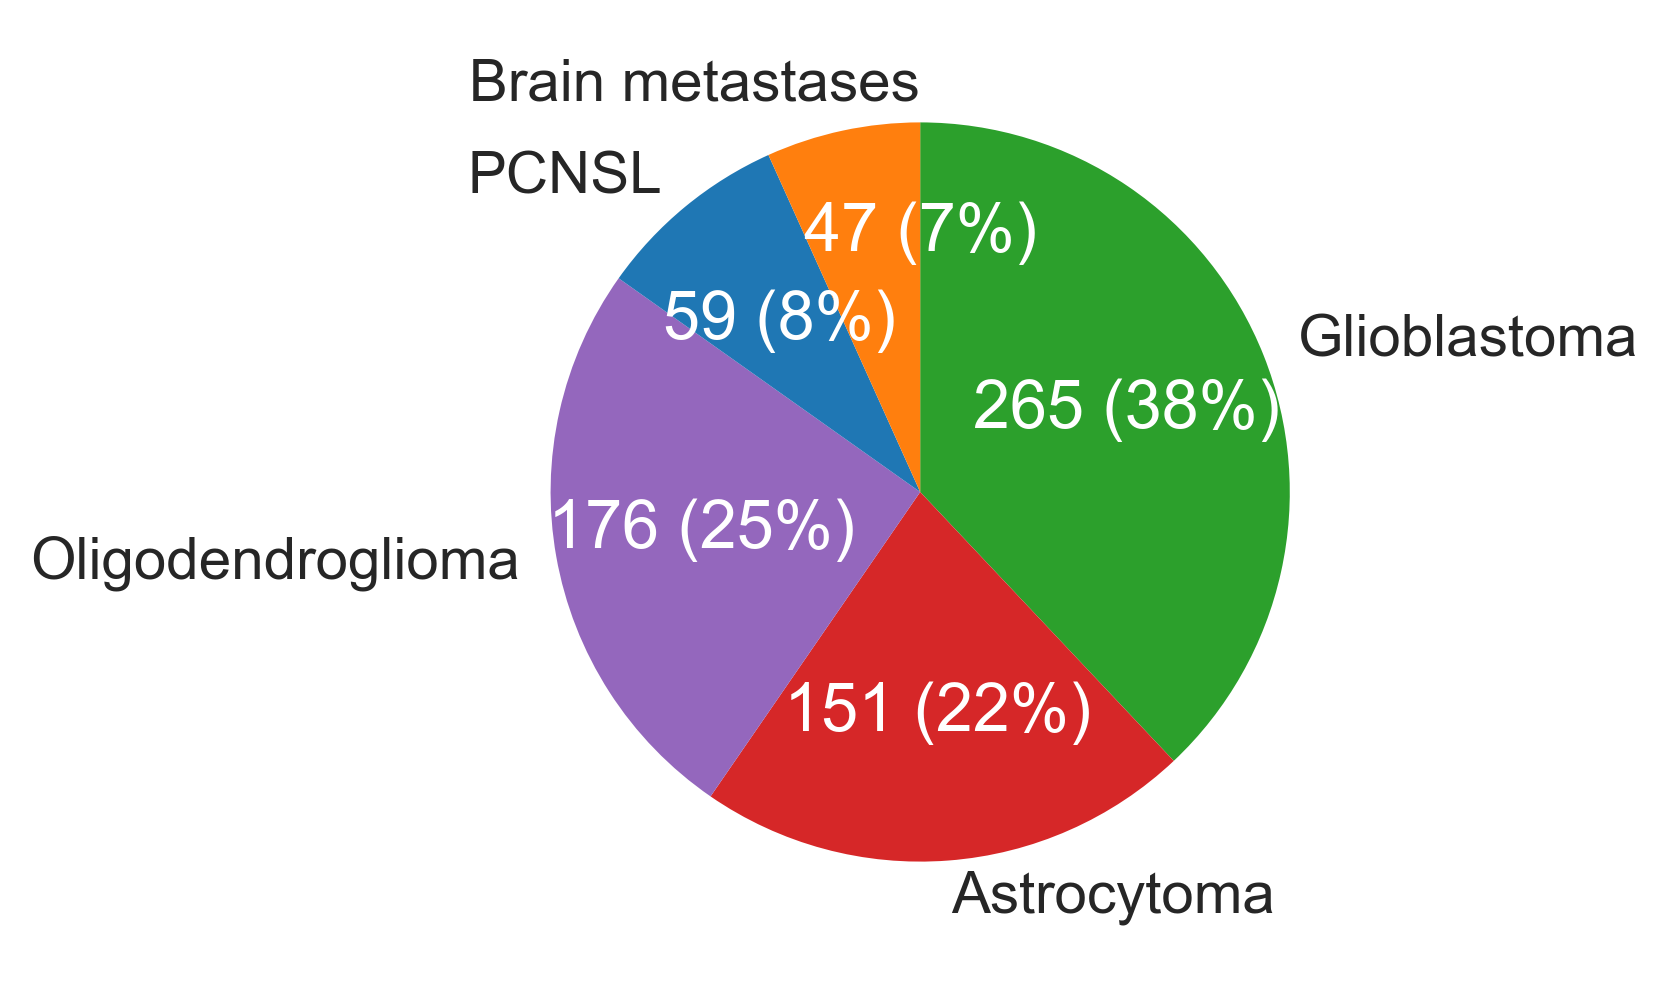

In [3]:
data = {
    'Glioblastoma': 265,
    'Astrocytoma': 151,
    'Oligodendroglioma': 176,
    'PCNSL': 59,
    'Brain metastases': 47,
    'Brain background': 0,
}
    
labels = list(data.keys())
counts = list(data.values())
total = sum(counts)

# 凡例用のラベルを作成（数値と割合を含める）
legend_labels = [
    f'{label}: {count} ({round(count/total*100)}%)'
    for label, count in data.items()
]


plt.figure(figsize=(6, 4))
wedges, texts, autotexts = plt.pie(
    counts, 
    startangle=90, 
    counterclock=False, 
    colors=colors,

    # labels=None,
    labels=labels,
    # labeldistance=1.1,
    
    autopct=lambda p: f'{round(p*total/100)} ({round(p)}%)',
    # pctdistance=0.8,
    wedgeprops={'width': 1, 'edgecolor': 'white', 'linewidth': 0},
)

# B: hide 
autotexts[-1].set_visible(False)
texts[-1].set_visible(False)

# M: move upper
texts[-2].set_position((0, 1.1))
autotexts[-2].set_position((0.0, 0.7))

for text in autotexts:
    text.set_fontsize(16)
    text.set_color('white')

plt.savefig('out/figs/fig1/dataset_pie_ebrains.png', format='png')
plt.show()

## fig2

In [4]:
from datasets import FoldDataset

ds = FoldDataset(
    source='enda4_512',
    fold=-1,
    total_fold=5,
    code='LMGAO_',
    limit=-1,
    upsample=False,
    target='all',
)
# ds.df

Using cache files
loaded all for fold -1
Balance: cases
0 all:51 A:6 G:13 L:11 M:16 O:5
1 all:49 A:5 G:13 L:10 M:17 O:4
2 all:49 A:5 G:13 L:10 M:16 O:5
3 all:50 A:5 G:14 L:10 M:16 O:5
4 all:50 A:5 G:13 L:11 M:16 O:5
Balance: tiles
0 all:28630 A:2937 G:9142 L:4060 M:9375 O:3116
1 all:26404 A:2016 G:9627 L:2891 M:9711 O:2159
2 all:26055 A:2158 G:9942 L:3068 M:8412 O:2475
3 all:27244 A:2217 G:10332 L:3312 M:8806 O:2577
4 all:27053 A:2512 G:8900 L:3657 M:9066 O:2918


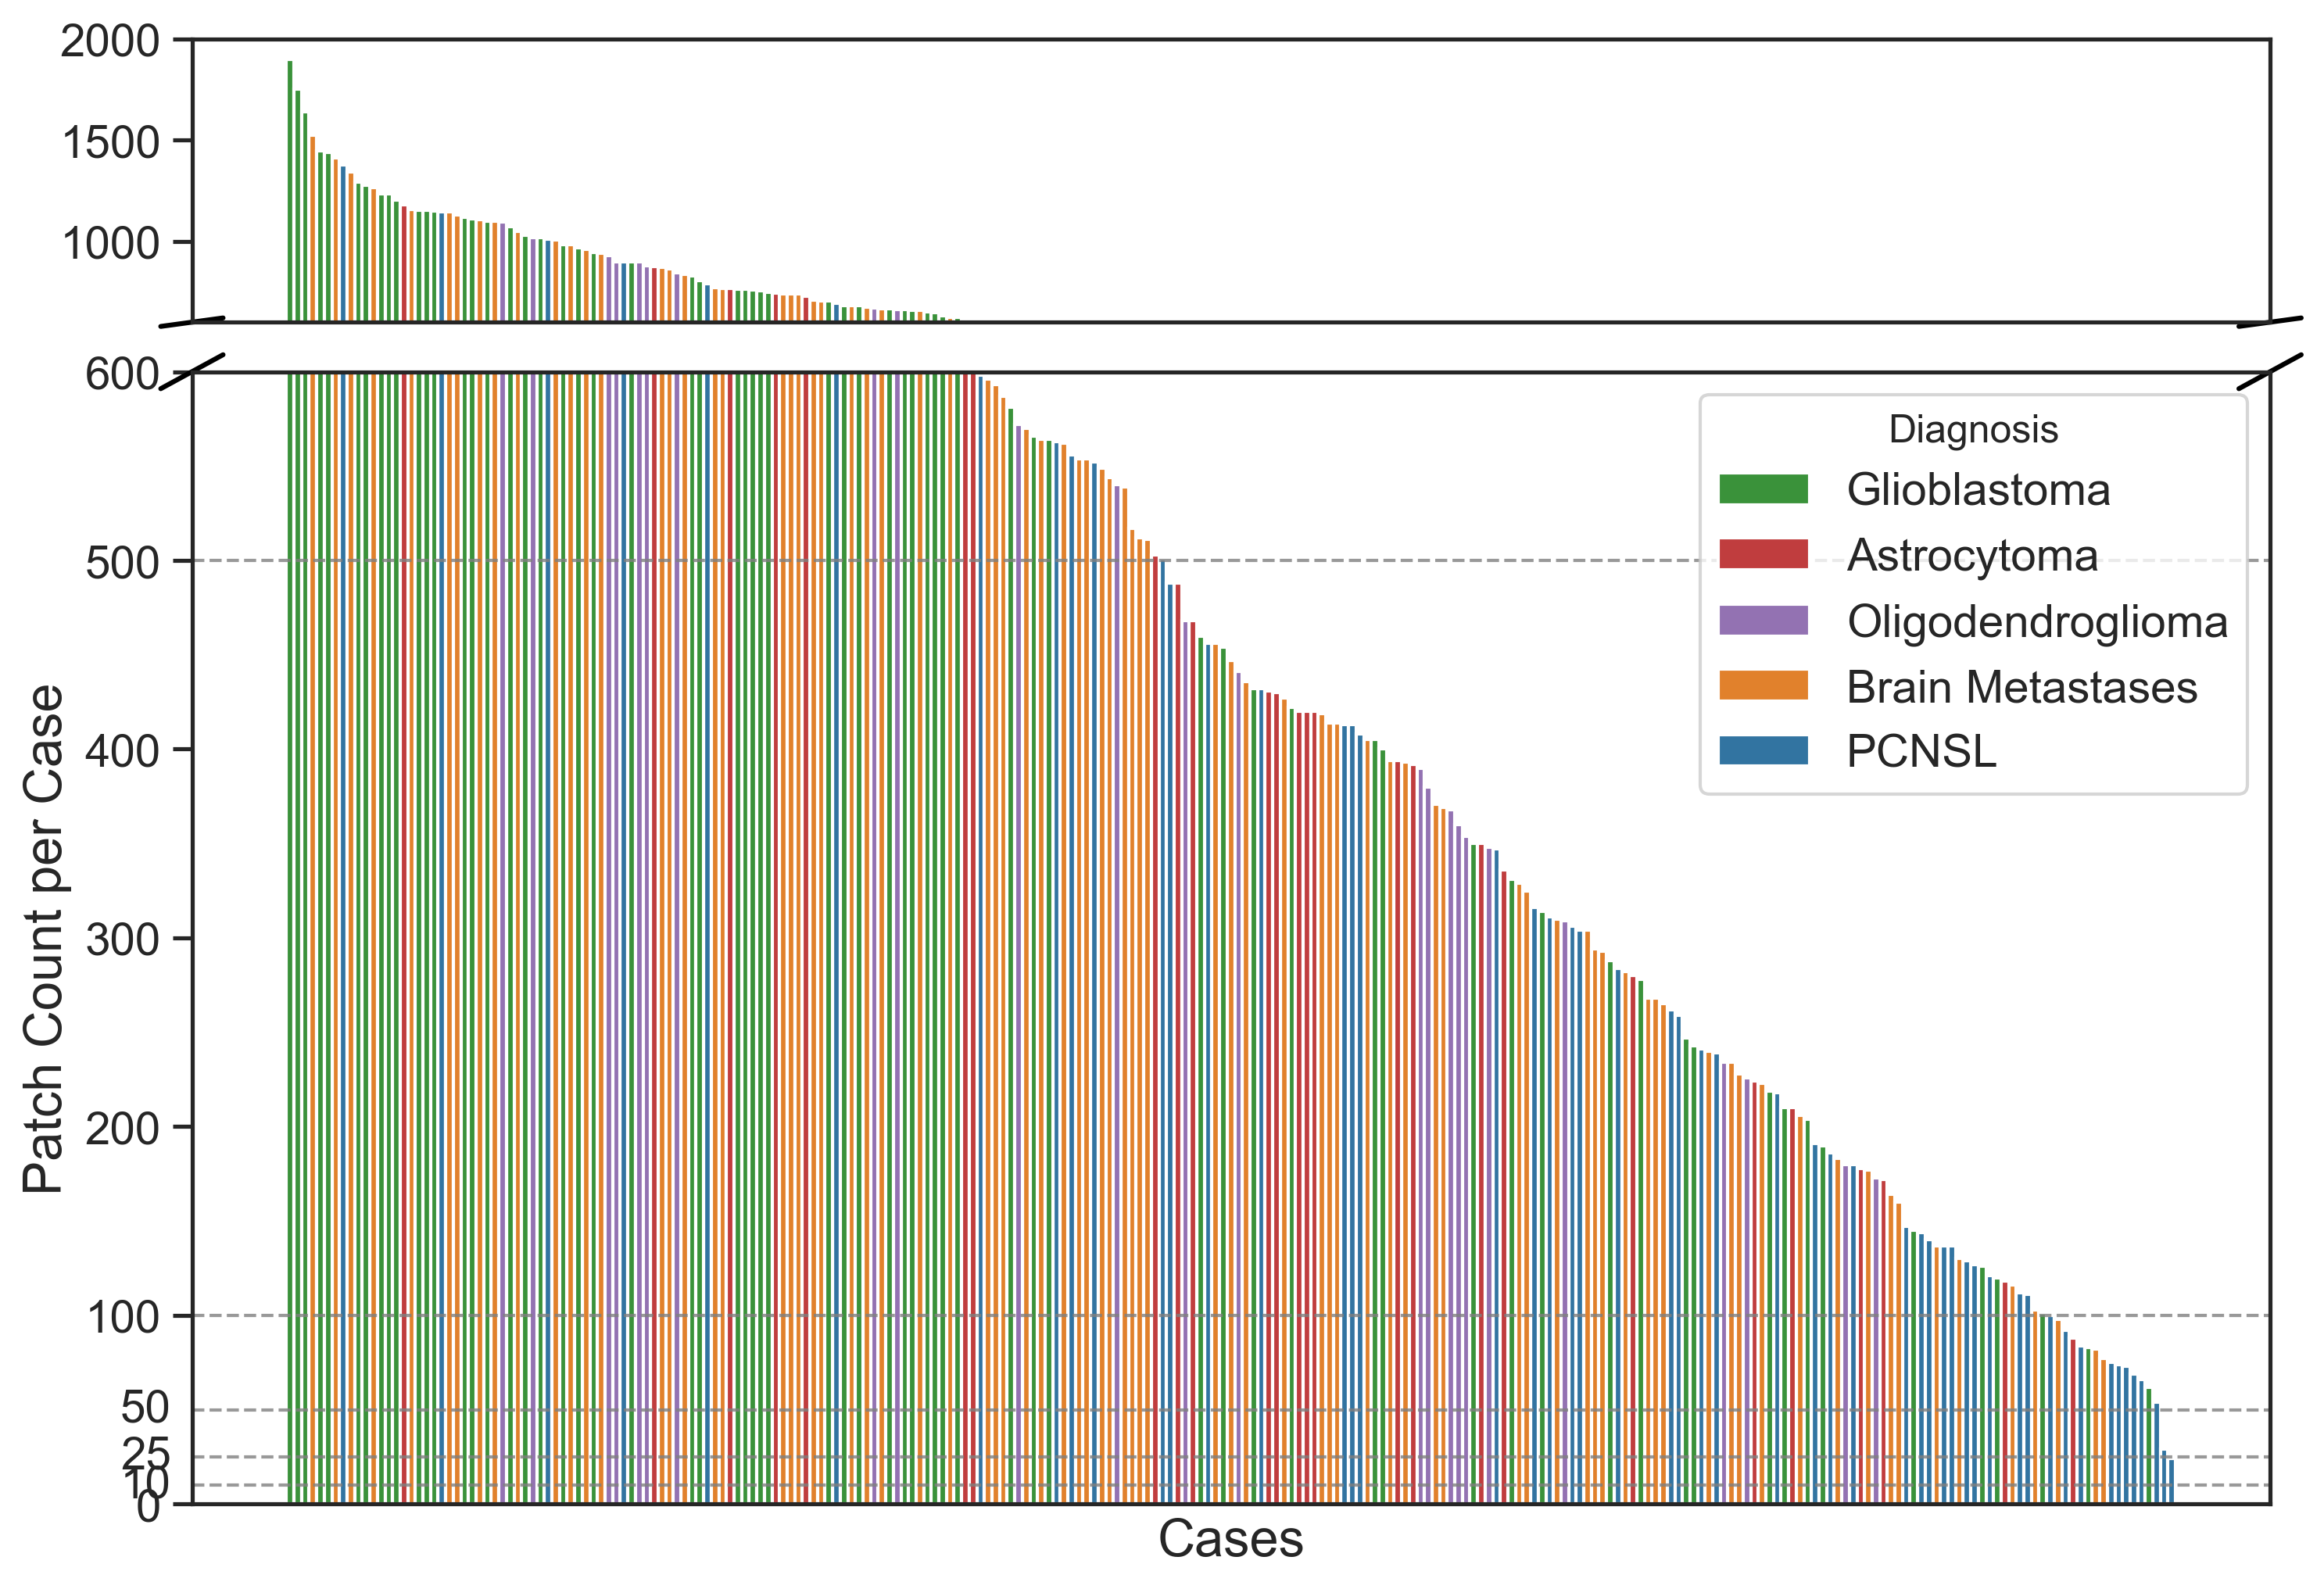

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec


# sns.set_theme(style="ticks")
# sns.reset_defaults()

legend_full_names = {
    'G': 'Glioblastoma',
    'A': 'Astrocytoma',
    'O': 'Oligodendroglioma',
    'M': 'Brain Metastases',
    'L': 'PCNSL',
}

fig = plt.figure(figsize=(10, 7))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 4])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

# データの最大値を取得
max_value = ds.df['diag'].value_counts().max()

# 上部のプロット（600以上）
sns.countplot(data=ds.df, x='name', hue='diag', order=ds.df['name'].value_counts().index, ax=ax1, width=1.0)
ax1.set_ylim(600, 2000)
ax1.set_xticks([])
ax1.set_xlabel('')

# 下部のプロット（0から600）
sns.countplot(data=ds.df, x='name', hue='diag', order=ds.df['name'].value_counts().index, ax=ax2, width=1.0)
ax2.set_ylim(0, 600)
ax2.set_xticks([])
ax2.set_xlabel('Cases')
ax2.set_yticks([0, 100, 200, 300, 400, 500, 600])

# y軸のラベルを設定
ax2.set_ylabel('Patch Count per Case')
ax1.set_ylabel('')

# 横線を追加（下部プロットのみ）
for y in [500, 100, 50, 25, 10]:
    ax2.axhline(y=y, color='gray', linestyle='--', alpha=0.8, linewidth=1)
    if y not in [500, 100]:
        ax2.text(-0.01, y, str(y), va='center', ha='right', transform=ax2.get_yaxis_transform(), size=14)

# legendを手動で並べ替えてfull nameで表示（下部プロットにのみ配置）
handles, labels = ax2.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax2.legend(
    [by_label[l] for l in legend_full_names],
    list(legend_full_names.values()),
    title='Diagnosis',
    loc='upper right'
)
ax1.legend().remove()  # 上部プロットのlegendを削除

# プロット間の空白を調整
plt.tight_layout()
fig.subplots_adjust(hspace=0.07)

# 軸の分割を示す斜線を追加
d = .015  # サイズ
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# def draw_wave(ax, x, y, width, height, wavelength=0.1, amplitude=0.01):
#     t = np.linspace(0, width, 100)
#     ax.plot(x + t, y + amplitude * np.sin(2 * np.pi * t / wavelength), 
#             color='k', clip_on=False, transform=ax.transAxes)
# draw_wave(ax1, 0, -0.02, 1, 0.02)
# draw_wave(ax2, 0, 1.02, 1, 0.02)

plt.savefig("out/figs/fig1/patch_count_per_case.png", format="png", dpi=600)
plt.show()